In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import simps, trapz, cumtrapz
from scipy.ndimage.filters import gaussian_filter1d
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 9]

In [3]:
pick = [4,6,8]

split_data =  pd.read_csv('split_grid02.csv')
for p in pick:
    split_data = pd.concat( [split_data, pd.read_csv('split_grid0' + str(p)+'.csv')])
split_data = split_data.loc[ split_data.Pf > 0 ]
split_data = split_data.loc[ split_data.Pf < 500 ]
split_data['rho'] = split_data.rhoco + split_data.rhome
split_data.head()

,yc0,P0,ycf,Pf,rhoco,rhome,rho
0,0.2,5,0.200211,4.995505,0.000023,0.000092,0.000115
1,0.2,10,0.195103,9.799007,0.000044,0.000183,0.000228
2,0.2,15,0.188418,15.219448,0.000067,0.000288,0.000355
3,0.2,20,0.210878,19.601427,0.000098,0.000367,0.000465
4,0.2,25,0.201698,25.570610,0.000123,0.000487,0.000611


Text(0.5, 0, 'Reservoir Pressure')

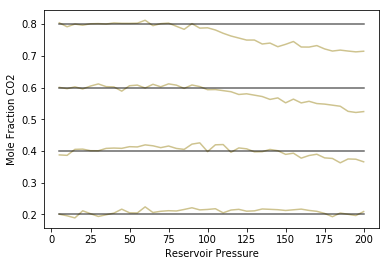

In [4]:
for yi in [0.2, 0.4, 0.6, 0.8]:
    select = split_data[ split_data.yc0 == yi]
    plt.plot( "P0", "ycf", data = select, label = yi, color = "#AE9C45", alpha = 0.6 )
    plt.plot( "P0", "yc0", data = select, label = str(yi) + "ref", color = "black", alpha = 0.6 )
plt.ylabel("Mole Fraction CO2")
plt.xlabel("Reservoir Pressure")

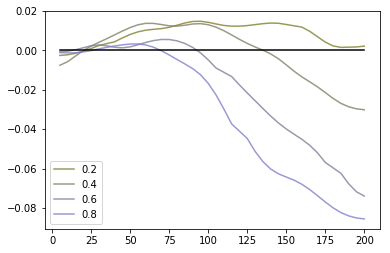

In [5]:
for yi in [0.2, 0.4, 0.6, 0.8]:
    select = split_data[ split_data.yc0 == yi]
    ynew = gaussian_filter1d( select.ycf-select.yc0, sigma=2)
    plt.plot( select.P0, ynew, color = (0.5,0.5,yi),alpha=0.8, label = yi )
    #plt.plot( select.P0, select.ycf-select.yc0, color = (0.5,0.5,yi),alpha=0.5 )
plt.plot( np.linspace(5,200, 40), np.zeros(40), color = "black" )
plt.legend()

Text(0.5, 0, 'Simulation Pressure')

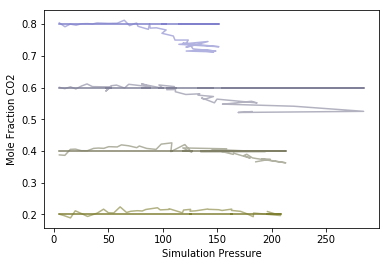

In [6]:
for yi in [0.2, 0.4, 0.6, 0.8]:
    select = split_data[ split_data.yc0 == yi]
    plt.plot( "Pf", "ycf", data = select, label = yi, color = (0.5,0.5,yi), alpha = 0.6 )
    plt.plot( "Pf", "yc0", data = select, label = str(yi) + "ref", color = (0.5,0.5,yi) )
plt.ylabel("Mole Fraction CO2")
plt.xlabel("Simulation Pressure")

Text(0.5, 0, 'Reservoir Pressure')

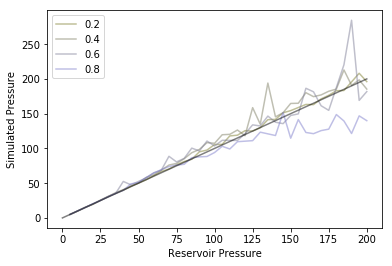

In [7]:
for yi in [0.2, 0.4, 0.6, 0.8]:
    select = split_data[ split_data.yc0 == yi]
    plt.plot( "P0", "Pf", data = select, label = yi, alpha = 0.5, color = (0.5,0.5,yi) )
plt.legend()
plt.plot( np.linspace(0,200,200), np.linspace(0,200,200), color = "black", alpha = 0.5 )
plt.ylabel("Simulated Pressure")
plt.xlabel("Reservoir Pressure")

Text(0, 0.5, 'Simulated Pressure')

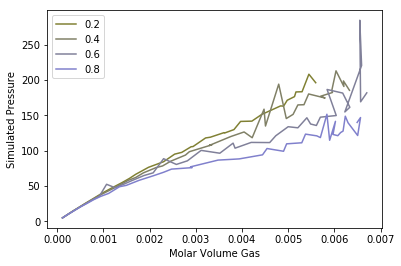

In [8]:
for yi in [0.2, 0.4, 0.6, 0.8]:
    select = split_data[ split_data.yc0 == yi]
    plt.plot( "rho", "Pf", data = select, label = yi,  color = (0.5,0.5,yi) )
plt.legend()
plt.xlabel("Molar Volume Gas")
plt.ylabel("Simulated Pressure")

Text(0, 0.5, 'Reservoir Pressure')

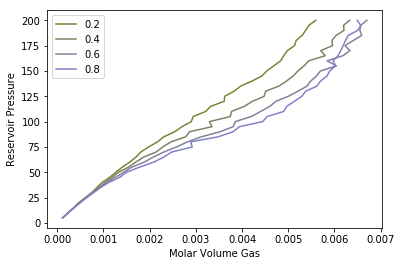

In [9]:
for yi in [0.2, 0.4, 0.6, 0.8]:
    select = split_data[ split_data.yc0 == yi]
    plt.plot( "rho", "P0", data = select, label = yi,  color = (0.5,0.5,yi) )
plt.legend()
plt.xlabel("Molar Volume Gas")
plt.ylabel("Reservoir Pressure")

Text(0.5, 0, 'Reservoir Mole Fraction')

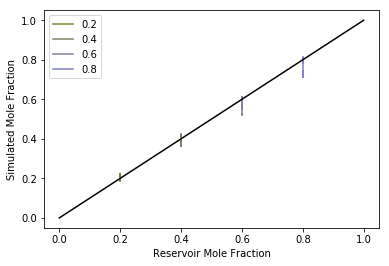

In [10]:
for yi in [0.2, 0.4, 0.6, 0.8]:
    select = split_data[ split_data.yc0 == yi]
    plt.plot( "yc0", "ycf", data = select, label = yi,color = (0.5,0.5,yi)  )
plt.plot( np.linspace(0,1,200), np.linspace(0,1,200), color = "black" )

plt.legend()
plt.ylabel("Simulated Mole Fraction")
plt.xlabel("Reservoir Mole Fraction")